In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import seaborn as sns



In [2]:
# import vade
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = "5G5qJbC2JnSOK7X0LuyBgdl1s"
consumer_secret = "SI1R97cioH9us6qzbV8lLfCdVzColdV7zZGdvDzivyJ8TD4JUx"
access_token = "358992061-DyzdZ3Ah4dayoVnmXTHH2ML2PguUVrGdSGNfSUgf"
access_token_secret = "dRGIIiZEkbfCuOME3uInFlyUUWixnjzHgzAeRVm79Y0eB"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
news_accounts = ['BBCWORLD','NYT','FoxNews','CBSNews','CNN', 'Politico']


In [5]:
public_tweet = api.user_timeline(news_accounts[0])

In [6]:
print(json.dumps(public_tweet[11], indent = 4, sort_keys= True, separators=(',', ': ')))

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Tue Dec 12 01:25:16 +0000 2017",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/9\u2026",
                "expanded_url": "https://twitter.com/i/web/status/940392072514818048",
                "indices": [
                    117,
                    140
                ],
                "url": "https://t.co/s82bQWiWCF"
            }
        ],
        "user_mentions": []
    },
    "favorite_count": 105,
    "favorited": false,
    "geo": null,
    "id": 940392072514818048,
    "id_str": "940392072514818048",
    "in_reply_to_screen_name": null,
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null,
    "is_quote_status": false,
    "lang": "en",
    "place": null,
    "possibly_sensitive": false,
    "retweet_count": 90

In [7]:
counter = 1
sentiment = []

In [8]:
for account in news_accounts:
    counter = 1 
    for x in range (5):
        account_tweets = api.user_timeline(account,page = x)
        
        for tweet in account_tweets:
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            
           
            
            sentiment.append({'User':account,
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
            
            counter = counter + 1
   
        

In [9]:
sentiment

[{'Compound': 0.0,
  'Date': 'Tue Dec 12 05:19:29 +0000 2017',
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'Tweets Ago': 1,
  'User': 'BBCWORLD'},
 {'Compound': -0.128,
  'Date': 'Tue Dec 12 05:16:16 +0000 2017',
  'Negative': 0.842,
  'Neutral': 0.158,
  'Positive': 0.0,
  'Tweets Ago': 2,
  'User': 'BBCWORLD'},
 {'Compound': -0.4767,
  'Date': 'Tue Dec 12 04:56:25 +0000 2017',
  'Negative': 0.744,
  'Neutral': 0.256,
  'Positive': 0.0,
  'Tweets Ago': 3,
  'User': 'BBCWORLD'},
 {'Compound': -0.4767,
  'Date': 'Tue Dec 12 04:17:38 +0000 2017',
  'Negative': 0.838,
  'Neutral': 0.162,
  'Positive': 0.0,
  'Tweets Ago': 4,
  'User': 'BBCWORLD'},
 {'Compound': -0.4019,
  'Date': 'Tue Dec 12 03:39:55 +0000 2017',
  'Negative': 0.838,
  'Neutral': 0.162,
  'Positive': 0.0,
  'Tweets Ago': 5,
  'User': 'BBCWORLD'},
 {'Compound': 0.4215,
  'Date': 'Tue Dec 12 03:09:56 +0000 2017',
  'Negative': 0.851,
  'Neutral': 0.0,
  'Positive': 0.149,
  'Tweets Ago': 6,
  'User': 'BBCWORLD

In [10]:
sentiment_tweets = pd.DataFrame.from_dict(sentiment)

In [11]:
sentiment_tweets['User'].unique()

array(['BBCWORLD', 'NYT', 'FoxNews', 'CBSNews', 'CNN', 'Politico'], dtype=object)

In [12]:
sentiment_filtered = sentiment_tweets[['Compound','Tweets Ago','User']]




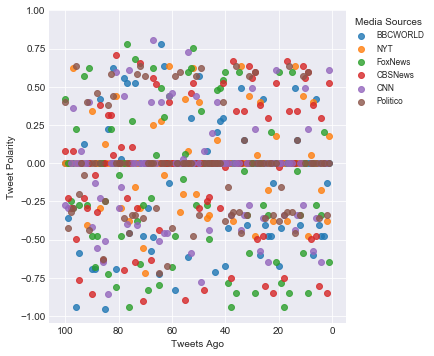

In [21]:

palette_color = sns.color_palette()
twitter_scatter = sns.lmplot(x='Tweets Ago', y='Compound', 
                             data=sentiment_filtered,hue='User' ,
                             palette=palette_color
                            ,fit_reg= False, legend = False)
plt.ylim(ymax = 1)
plt.gca().invert_xaxis()
plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)
plt.ylabel('Tweet Polarity')
plt.grid(True)
plt.show()

In [35]:
df_bar_grouping = sentiment_filtered.groupby(['User']).mean()['Compound']


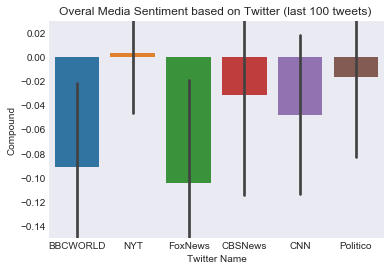

In [41]:
sns.set_style(style='dark')

bar_tweet = sns.barplot(x='User', y='Compound', data=sentiment_filtered)
plt.title('Overal Media Sentiment based on Twitter (last 100 tweets) ')
plt.xlabel('Twitter Name')
plt.ylim(ymax = .03)
plt.ylim(ymin = -.15)
plt.show()